In [1]:
# Import modules and DB

from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
import qgrid
from ipywidgets import interact, interact_manual
import cufflinks as cf

df = pd.read_excel(r'C:\Users\harshvardhans\Desktop\01.06.19 to 01.06.20.xlsx')


# for when you get sql database access

#import pyobdc
#conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\harshvardhans\Desktop\purchase.accdb;')
#cursor = conn.cursor()
#cursor.execute('select * from details') # table name is details
#for row in cursor.fetchall():
    #print (row)
#df = pd.DataFrame(SQL_Query, columns=['product_name','product_price_per_unit','units_ordered','revenue'])
#print (df)

In [2]:
# pre processing

df = df[df['PO Line Status'] != 'Canceled']
df['Extended Cost'] = df["Extended Cost"].str.replace("AED", "")
df['Extended Cost'] = df["Extended Cost"].str.replace(",", "")
df['Unit Cost'] = df["Unit Cost"].str.replace("AED", "")
df['Unit Cost'] = df["Unit Cost"].str.replace(",", "")
df['Item Description'] = df['Item Description'].str.lower()
df[['Unit Cost', 'Extended Cost']] = df[['Unit Cost', 'Extended Cost']].apply(pd.to_numeric)

In [3]:
df.drop([
        'Item Number',
        'Released Date',
        'Required Date',
        'Required Date from Purchase Transactions',
        'Requisition Date',
        'QTY Rejected',
        'QTY Reserved',
        'Returns YTD','PO Line Status',
        'Document Status',
        'PO Status',
        'QTY Shipped',
        'QTY Invoiced',
        'QTY Matched',
        'QTY Canceled',
        'Tax Registration Number',
        'PO Type',
        'User To Enter'
       ],axis=1, inplace=True)

In [4]:
x = input("Type to search for item : ")
x = x.lower()
words = x.split(' ')
submasks = [df['Item Description'].str.contains(s) for s in words]
combined = np.vstack(submasks).all(axis=0)
q = df[combined].sort_values(by ='Document Date' , ascending=False)

button = widgets.Button(description='Copy to Clipboard')
display(button)

def on_button_clicked(b):
    q.to_clipboard()
    
button.on_click(on_button_clicked)

display(HTML(q.to_html()))

#qgrid.show_grid(q, show_toolbar = True)

Type to search for item : Insulation 19|3/4


Button(description='Copy to Clipboard', style=ButtonStyle())

,PO Number,Document Date,Cost Category ID,Item Description,Vendor ID,Vendor Name,QTY Ordered,Unit Cost,U Of M,Extended Cost,Project Number,Payment Terms ID
7919,MEP0033956,2020-04-21,1052P,"k flex ""k-protect"" polyolefin xlpe insulationb 19mm thk,",F090,FJCARE Technical Services LLC,38.0,257.00,Rolls,9766.00,A178C001UJ180,90 DAYS PDC
6975,MEP0033777,2020-02-05,1052P,"aerofoam rubber insulation - 3/8"" x 19mm (40/box)",I103,Al Imran A/C Spare Parts LLC,3.0,125.00,Box,375.00,N058C001UJ179,60 days PDC
6974,MEP0033777,2020-02-05,1052P,"aerofoam rubber insulation - 3/4"" x 19mm (30/box)",I103,Al Imran A/C Spare Parts LLC,4.0,125.00,Box,500.00,N058C001UJ179,60 days PDC
4405,MEP0033291,2019-10-01,1052P,"k flex ""k-protect"" polyolefin xlpe insulation 19mm thick",F090,FJCARE Technical Services LLC,4.0,237.24,Rolls,948.96,UJ164C008Z521,90 Days
4021,MEP0033239,2019-09-19,1012P,"kaiflex-st insulation- 25 x 18 x 2 mtr. (3/4"" cu)",A038,ADVANCE TECHNICAL PARTS CO LLC,50.0,5.74,Mtr,287.00,G029C001PJ231,120 Days
3892,MEP0033209,2019-09-15,1010P,"closed cell elastomeric rubber insulation 3/4"" x 3/8"" thk",A038,ADVANCE TECHNICAL PARTS CO LLC,40.0,1.90,Mtr,76.00,S084C137J260,120 Days PDC
3566,MEP0033118,2019-08-27,1046P,k flex st pipe insulation - 19mm thick x 42mm dia (32 mtr/box),F090,FJCARE Technical Services LLC,11.0,151.57,Box,1667.27,A172C001PJ242,90 Days PDC
3569,MEP0033118,2019-08-27,1046P,k flex st pipe insulation - 19mm thick x 22mm dia (64 mtr/box),F090,FJCARE Technical Services LLC,3.0,171.58,Box,514.74,A172C001PJ242,90 Days PDC
3568,MEP0033118,2019-08-27,1046P,k flex st pipe insulation - 19mm thick x 28mm dia (48 mtr/box),F090,FJCARE Technical Services LLC,7.0,159.49,Box,1116.43,A172C001PJ242,90 Days PDC
3567,MEP0033118,2019-08-27,1046P,k flex st pipe insulation - 19mm thick x 35mm dia (36 mtr/box),F090,FJCARE Technical Services LLC,5.0,144.69,Box,723.45,A172C001PJ242,90 Days PDC


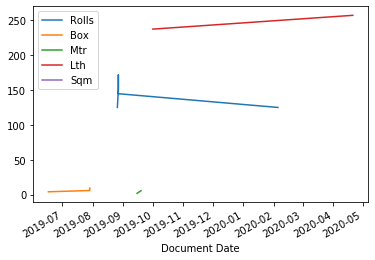

In [5]:
fig, ax = plt.subplots()
names = q['U Of M'].unique()
q.groupby('U Of M').plot(x='Document Date', y='Unit Cost', ax=ax)
plt.legend(names)
plt.show()

In [10]:
max_order = q['Document Date'].max()
max_df = q[q['Document Date'] == q['Document Date'].max()]
print('Last Order Price is AED {} per {}'.format(max_df.iloc[0]['Unit Cost'],
                                             max_df.iloc[0]['U Of M']))

display(button)

def on_button_clicked(b):
    max_df.to_clipboard()
    
button.on_click(on_button_clicked)

display(HTML(max_df.to_html()))

Last Order Price is AED 257.0 per Rolls


Button(description='Copy to Clipboard', style=ButtonStyle())

,PO Number,Document Date,Cost Category ID,Item Description,Vendor ID,Vendor Name,QTY Ordered,Unit Cost,U Of M,Extended Cost,Project Number,Payment Terms ID
3892,MEP0033209,2019-09-15,1010P,"closed cell elastomeric rubber insulation 3/4"" x 3/8"" thk",A038,ADVANCE TECHNICAL PARTS CO LLC,40.0,1.90,Mtr,76.0,S084C137J260,120 Days PDC
544,MEP0032684,2019-06-17,1046P,"closed cell elastomeric insulation 3/4"" x 3/4"" thk (uj173)",R020,Rubber World Industries,90.0,4.17,Lth,375.3,N052C001UJ173,60 Days PDC
547,MEP0032684,2019-06-17,1046P,"closed cell elastomeric insulation 3/4"" x 3/4"" thk (uj176)",R020,Rubber World Industries,90.0,4.17,Lth,375.3,N055C001UJ176,60 Days PDC


In [12]:
min = q['Unit Cost'].min()
min_df = q[q['Unit Cost'] == q['Unit Cost'].min()]

print('Minimum Order Price is {} per {}'.format(min_df.iloc[0]['Unit Cost'],
                                                min_df.iloc[0]['U Of M']))

display(button)

def on_button_clicked(b):
    min_df.to_clipboard()
    
button.on_click(on_button_clicked)

display(HTML(q.sort_values(by ='Unit Cost').head(3).to_html()))

Minimum Order Price is 1.9 per Mtr


Button(description='Copy to Clipboard', style=ButtonStyle())

,PO Number,Document Date,Cost Category ID,Item Description,Vendor ID,Vendor Name,QTY Ordered,Unit Cost,U Of M,Extended Cost,Project Number,Payment Terms ID
3892,MEP0033209,2019-09-15,1010P,"closed cell elastomeric rubber insulation 3/4"" x 3/8"" thk",A038,ADVANCE TECHNICAL PARTS CO LLC,40.0,1.90,Mtr,76.0,S084C137J260,120 Days PDC
544,MEP0032684,2019-06-17,1046P,"closed cell elastomeric insulation 3/4"" x 3/4"" thk (uj173)",R020,Rubber World Industries,90.0,4.17,Lth,375.3,N052C001UJ173,60 Days PDC
547,MEP0032684,2019-06-17,1046P,"closed cell elastomeric insulation 3/4"" x 3/4"" thk (uj176)",R020,Rubber World Industries,90.0,4.17,Lth,375.3,N055C001UJ176,60 Days PDC


In [29]:
'''
def get_ratio(row):
    name = 'insulation 19mm'
    name1 = row['Item Description']
    d = fuzz.token_set_ratio(name, name1)
    return d
len(df[df.apply(get_ratio, axis=1) > 90]) / len(df)
#change a, b, c, d to get the shortest value of above
'''

"\ndef get_ratio(row):\n    name = 'insulation 19mm'\n    name1 = row['Item Description']\n    d = fuzz.token_set_ratio(name, name1)\n    return d\nlen(df[df.apply(get_ratio, axis=1) > 90]) / len(df)\n#change a, b, c, d to get the shortest value of above\n"

In [30]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [13]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [20]:
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(q['Project Number']))

output_year = widgets.Output()

def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(q)
        else:
            display(q[q['Project Number'] == change.new])
        
dropdown_year.observe(dropdown_year_eventhandler, names='value')

display(dropdown_year)

Dropdown(options=('ALL', 'A172C001PJ242', 'A178C001UJ180', 'C018C001PJ236', 'G029C001PJ231', 'G034C015UJ169', …

In [21]:
@interact
def show_articles_more_than(column=['Unit Cost','QTY Ordered'], 
                            x=(10,500,10)):
    return q.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=('Unit Cost', 'QTY Ordered'), value='Unit Cost'),…

In [ ]:
@interact
def scatter_plot(x=list(q.select_dtypes('number').columns), 
                 y=list(q.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    q.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='Item Description',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)